In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv(r"C:\Users\jonat\Downloads\train.csv")
df_test = pd.read_csv(r"C:\Users\jonat\Downloads\test.csv")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Dropping irrelevant columns
df_train.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)

In [7]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [8]:
# Fill 'Age' with median value
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)

In [9]:
# Fill 'Embarked' with the most common value
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

In [10]:
# Encode 'Sex' as a binary variable
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})

In [11]:
# One-hot encode 'Embarked'
df_train = pd.get_dummies(df_train, columns=['Embarked'], drop_first=True)

In [12]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,A/5 21171,7.2500,False,True
1,1,1,1,38.0,1,0,PC 17599,71.2833,False,False
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,1,1,1,35.0,1,0,113803,53.1000,False,True
4,0,3,0,35.0,0,0,373450,8.0500,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,211536,13.0000,False,True
887,1,1,1,19.0,0,0,112053,30.0000,False,True
888,0,3,1,28.0,1,2,W./C. 6607,23.4500,False,True
889,1,1,0,26.0,0,0,111369,30.0000,False,False


Parsing Ticket Data to extract out features 

Step 1: Extract Ticket Prefix

Goal: To extract the prefix of each ticket if it exists, or label it as "NoPrefix" if no prefix is present.

Example:
"A/5 21171" becomes "A/5"
"113803" (a ticket with no prefix) becomes "NoPrefix"

In [13]:
print(df_train.columns)  # Check column names 

df_train

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,A/5 21171,7.2500,False,True
1,1,1,1,38.0,1,0,PC 17599,71.2833,False,False
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,1,1,1,35.0,1,0,113803,53.1000,False,True
4,0,3,0,35.0,0,0,373450,8.0500,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,211536,13.0000,False,True
887,1,1,1,19.0,0,0,112053,30.0000,False,True
888,0,3,1,28.0,1,2,W./C. 6607,23.4500,False,True
889,1,1,0,26.0,0,0,111369,30.0000,False,False


In [14]:
# Separate the prefix and numeric part
df_train['Ticket_Prefix'] = df_train['Ticket'].apply(lambda x: x.split(' ')[0] if len(x.split(' ')) > 1 else 'NoPrefix')
df_train['Ticket_Num'] = df_train['Ticket'].apply(lambda x: ''.join(filter(str.isdigit, x)) if any(char.isdigit() for char in x) else '0').astype(int)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Ticket_Prefix,Ticket_Num
0,0,3,0,22.0,1,0,A/5 21171,7.2500,False,True,A/5,521171
1,1,1,1,38.0,1,0,PC 17599,71.2833,False,False,PC,17599
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,False,True,STON/O2.,23101282
3,1,1,1,35.0,1,0,113803,53.1000,False,True,NoPrefix,113803
4,0,3,0,35.0,0,0,373450,8.0500,False,True,NoPrefix,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,211536,13.0000,False,True,NoPrefix,211536
887,1,1,1,19.0,0,0,112053,30.0000,False,True,NoPrefix,112053
888,0,3,1,28.0,1,2,W./C. 6607,23.4500,False,True,W./C.,6607
889,1,1,0,26.0,0,0,111369,30.0000,False,False,NoPrefix,111369


In [15]:
# One-hot encode Ticket_Prefix with a prefix to avoid conflicts
df_train = pd.get_dummies(df_train, columns=['Ticket_Prefix'], drop_first=True, prefix='Ticket_Prefix')

In [16]:
# Step 3: Check and safely drop 'Ticket' column if present
if 'Ticket' in df_train.columns:
    df_train.drop('Ticket', axis=1, inplace=True)

# Step 4: Verify the final columns
print("Final columns:", df_train.columns)

df_train


Final columns: Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S', 'Ticket_Num', 'Ticket_Prefix_A.5.',
       'Ticket_Prefix_A/4', 'Ticket_Prefix_A/4.', 'Ticket_Prefix_A/5',
       'Ticket_Prefix_A/5.', 'Ticket_Prefix_A/S', 'Ticket_Prefix_A4.',
       'Ticket_Prefix_C', 'Ticket_Prefix_C.A.', 'Ticket_Prefix_C.A./SOTON',
       'Ticket_Prefix_CA', 'Ticket_Prefix_CA.', 'Ticket_Prefix_F.C.',
       'Ticket_Prefix_F.C.C.', 'Ticket_Prefix_Fa', 'Ticket_Prefix_NoPrefix',
       'Ticket_Prefix_P/PP', 'Ticket_Prefix_PC', 'Ticket_Prefix_PP',
       'Ticket_Prefix_S.C./A.4.', 'Ticket_Prefix_S.C./PARIS',
       'Ticket_Prefix_S.O./P.P.', 'Ticket_Prefix_S.O.C.',
       'Ticket_Prefix_S.O.P.', 'Ticket_Prefix_S.P.', 'Ticket_Prefix_S.W./PP',
       'Ticket_Prefix_SC', 'Ticket_Prefix_SC/AH', 'Ticket_Prefix_SC/PARIS',
       'Ticket_Prefix_SC/Paris', 'Ticket_Prefix_SCO/W', 'Ticket_Prefix_SO/C',
       'Ticket_Prefix_SOTON/O.Q.', 'Ticket_Prefix_SOTON/O2'

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Ticket_Num,...,Ticket_Prefix_SOTON/O.Q.,Ticket_Prefix_SOTON/O2,Ticket_Prefix_SOTON/OQ,Ticket_Prefix_STON/O,Ticket_Prefix_STON/O2.,Ticket_Prefix_SW/PP,Ticket_Prefix_W./C.,Ticket_Prefix_W.E.P.,Ticket_Prefix_W/C,Ticket_Prefix_WE/P
0,0,3,0,22.0,1,0,7.2500,False,True,521171,...,False,False,False,False,False,False,False,False,False,False
1,1,1,1,38.0,1,0,71.2833,False,False,17599,...,False,False,False,False,False,False,False,False,False,False
2,1,3,1,26.0,0,0,7.9250,False,True,23101282,...,False,False,False,False,True,False,False,False,False,False
3,1,1,1,35.0,1,0,53.1000,False,True,113803,...,False,False,False,False,False,False,False,False,False,False
4,0,3,0,35.0,0,0,8.0500,False,True,373450,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,False,True,211536,...,False,False,False,False,False,False,False,False,False,False
887,1,1,1,19.0,0,0,30.0000,False,True,112053,...,False,False,False,False,False,False,False,False,False,False
888,0,3,1,28.0,1,2,23.4500,False,True,6607,...,False,False,False,False,False,False,True,False,False,False
889,1,1,0,26.0,0,0,30.0000,False,False,111369,...,False,False,False,False,False,False,False,False,False,False


### Binning (Discretization of Continuous Variables)
What is Binning? Binning is the process of converting a continuous variable (like Age or Fare) into discrete intervals or categories (bins). For example, instead of using the exact age of each passenger (e.g., 22, 38, 26), you could categorize them into broader age groups like "Child", "Teen", "Adult", etc.

### Why Use Binning?

Reduce the Impact of Outliers: Continuous variables can have outliers (extreme values) that skew model performance. Binning helps minimize the impact of these outliers by grouping values into categories.

Example: A Fare value of 5000 is an outlier, but if you categorize Fare into bins (e.g., "Low", "Medium", "High"), this extreme value is handled as "Very High" without affecting the scale.

Handle Non-Linear Relationships: If the relationship between a feature and the target variable is non-linear, converting the continuous feature into bins can help your model capture those relationships better.

Example: Age might have a non-linear effect on survival — children and seniors might have different survival chances compared to middle-aged adults.
Simplify Model Interpretability: Binned features are easier to interpret than continuous values because they group data into intuitive categories.

Example: A model using Age bins like "Child", "Adult", "Senior" is easier to interpret than using a wide range of continuous age values.

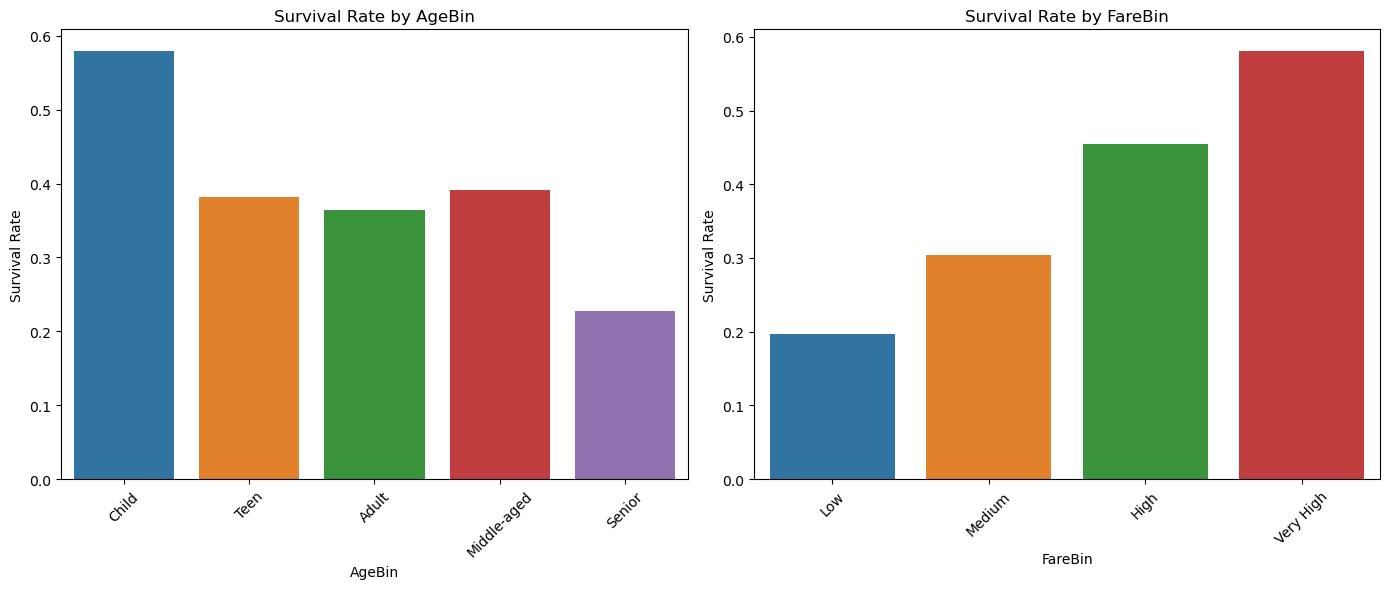

In [17]:
df_train['AgeBin'] = pd.cut(df_train['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])
df_train['FareBin'] = pd.qcut(df_train['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Plot Survival Rate by AgeBin
plt.figure(figsize=(14, 6))

# Plot for AgeBin
plt.subplot(1, 2, 1)
sns.barplot(x='AgeBin', y='Survived', data=df_train, ci=None)
plt.title('Survival Rate by AgeBin')
plt.xlabel('AgeBin')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)

# Plot for FareBin
plt.subplot(1, 2, 2)
sns.barplot(x='FareBin', y='Survived', data=df_train, ci=None)
plt.title('Survival Rate by FareBin')
plt.xlabel('FareBin')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [18]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1  # Add 1 to include the passenger
# Create a FamilySize feature by combining the SibSp (siblings/spouses aboard) and Parch (parents/children aboard)

In [19]:
# Combine 'SibSp' and 'Parch' into 'FamilySize' and create 'IsAlone'
df_train['IsAlone'] = 1
df_train['IsAlone'].loc[df_train['FamilySize'] > 1] = 0

# Drop columns that are not useful for modeling
columns_to_drop = ['SibSp', 'Parch']  # FamilySize and IsAlone are sufficient
df_train.drop(columns=columns_to_drop, axis=1, inplace=True)


In [20]:
# Binning 'Age' and 'Fare'
df_train['AgeBin'] = pd.cut(df_train['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])
df_train['FareBin'] = pd.qcut(df_train['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])


In [21]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Label encode 'AgeBin' and 'FareBin'
df_train['AgeBin'] = le.fit_transform(df_train['AgeBin'])
df_train['FareBin'] = le.fit_transform(df_train['FareBin'])

# Create 'FarePerPerson'
df_train['FarePerPerson'] = df_train['Fare'] / df_train['FamilySize']

In [22]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S',
       'Ticket_Num', 'Ticket_Prefix_A.5.', 'Ticket_Prefix_A/4',
       'Ticket_Prefix_A/4.', 'Ticket_Prefix_A/5', 'Ticket_Prefix_A/5.',
       'Ticket_Prefix_A/S', 'Ticket_Prefix_A4.', 'Ticket_Prefix_C',
       'Ticket_Prefix_C.A.', 'Ticket_Prefix_C.A./SOTON', 'Ticket_Prefix_CA',
       'Ticket_Prefix_CA.', 'Ticket_Prefix_F.C.', 'Ticket_Prefix_F.C.C.',
       'Ticket_Prefix_Fa', 'Ticket_Prefix_NoPrefix', 'Ticket_Prefix_P/PP',
       'Ticket_Prefix_PC', 'Ticket_Prefix_PP', 'Ticket_Prefix_S.C./A.4.',
       'Ticket_Prefix_S.C./PARIS', 'Ticket_Prefix_S.O./P.P.',
       'Ticket_Prefix_S.O.C.', 'Ticket_Prefix_S.O.P.', 'Ticket_Prefix_S.P.',
       'Ticket_Prefix_S.W./PP', 'Ticket_Prefix_SC', 'Ticket_Prefix_SC/AH',
       'Ticket_Prefix_SC/PARIS', 'Ticket_Prefix_SC/Paris',
       'Ticket_Prefix_SCO/W', 'Ticket_Prefix_SO/C', 'Ticket_Prefix_SOTON/O.Q.',
       'Ticket_Prefix_SOTON/O2', 'Ticket_Prefix_SOTON/OQ',
     

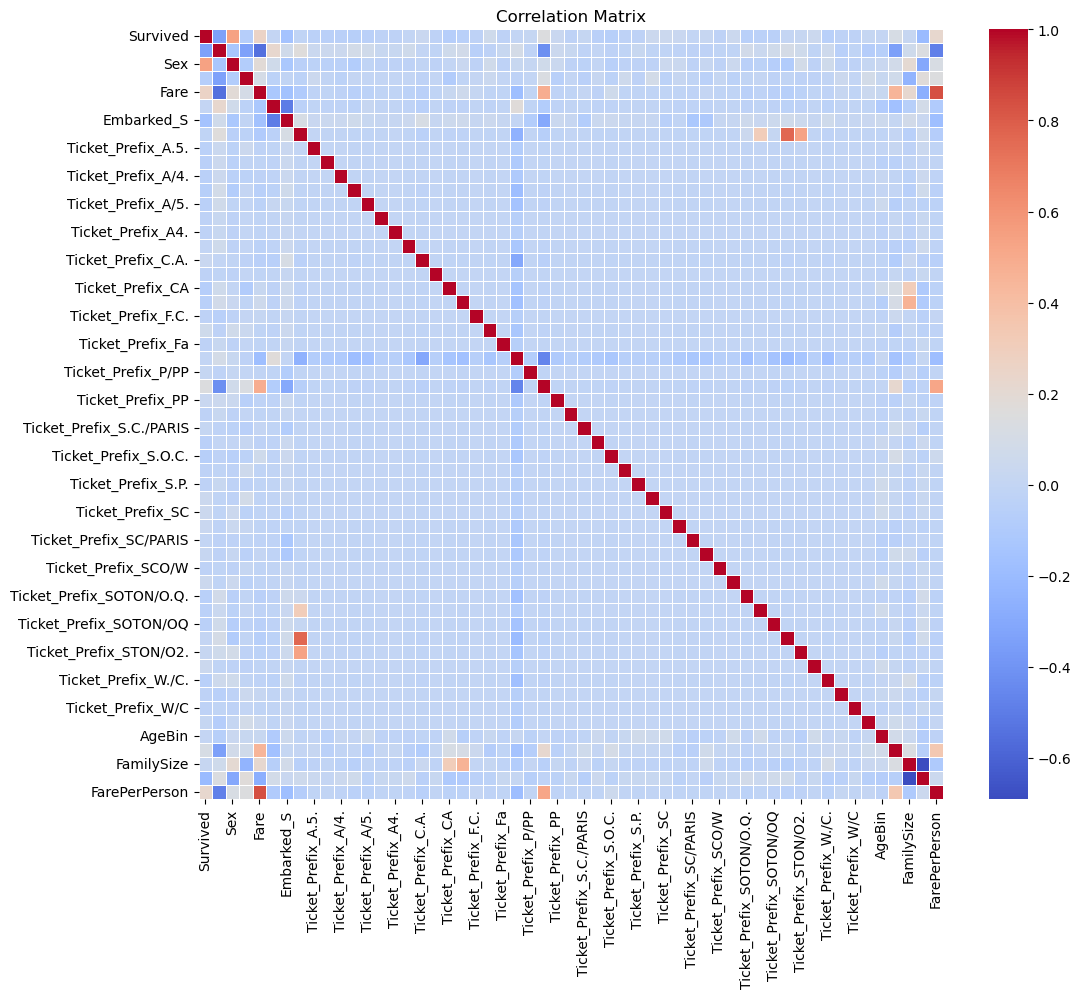

In [23]:

# Calculate correlation matrix
corr_matrix = df_train.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### Key Variables Correlated with Survived
Sex: There appears to be a strong correlation between Sex and Survived. This is consistent with the Titanic dataset's known fact that women had a higher chance of survival than men.

Fare: There is a noticeable positive correlation between Fare and Survived. This indicates that passengers who paid higher fares were more likely to survive, possibly because they had access to better accommodations or lifeboats.

FareBin_Very High: As expected, the bin for very high fares has a stronger correlation with Survived, reinforcing the relationship between higher fares and higher survival rates.

### Little Correlation with Other Features
Ticket Prefixes: Most of the ticket prefixes show very little correlation with Survived, which means they may not be very predictive on their own.
I may consider to drop them if they add noise.

Age Bins: There are only small correlations between the AgeBin features (e.g., AgeBin_Teen, AgeBin_Middle-aged) and Survived. This suggests that age may not be a very strong predictor of survival in its binned form, though specific age groups (like children) could still have some predictive power.

### Correlation Among Ticket_Prefix Columns
Some Ticket_Prefix columns show correlations among themselves (e.g., Ticket_Prefix_A/5 and Ticket_Prefix_A4.), which could indicate shared characteristics or associations among certain ticket groups.
Might need to look closer at these correlations to see if some prefixes can be grouped together to reduce dimensionality. 
Might apply Principle-Componenet-Analysis for dimension reduction.

### No Strong Multicollinearity
Overall, the matrix does not show strong correlations among most features, implying that there may not be serious multicollinearity issues. This is good for model stability, as features are not overly redundant.

Got to ensure that Sex, Fare, and their derived features (like FareBin) are retained as key predictors in your model, as they are highly correlated with Survived.

### Potential for Binned Features: 
Reassess the impact of the AgeBin and FareBin features on model performance. If they do not contribute significantly, consider using the original continuous variables or optimizing how they are binned.

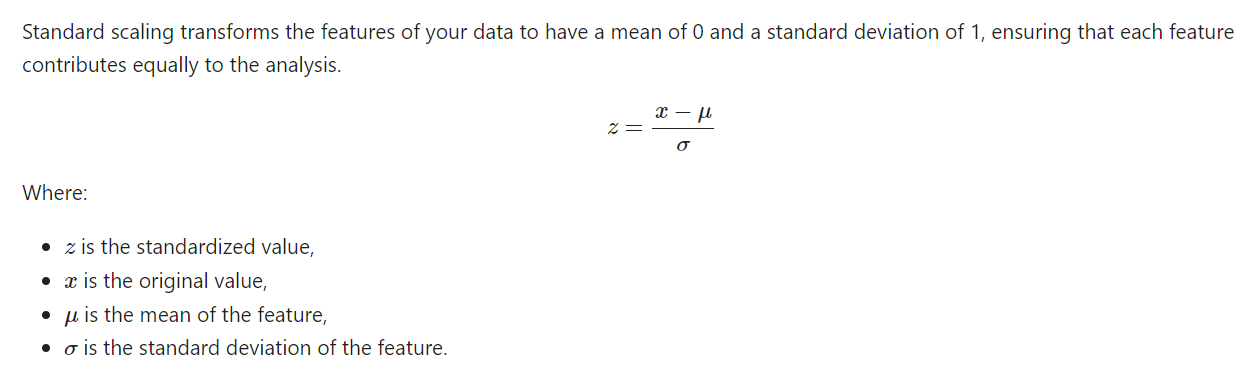

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Columns that are needed to scale (including Ticket Prefix and other continuous features)
ticket_prefix_cols = [col for col in df_train.columns if col.startswith('Ticket_Prefix_')]
continuous_cols = ['Age', 'Fare', 'FarePerPerson'] + ticket_prefix_cols

# Standard scale all continuous columns
scaler = StandardScaler()
df_train[continuous_cols] = scaler.fit_transform(df_train[continuous_cols])

In [25]:
# Apply PCA on the scaled Ticket Prefix columns
pca = PCA(n_components=5)  # You can set n_components as needed
ticket_prefix_pca = pca.fit_transform(df_train[ticket_prefix_cols])

In [26]:
# Create a DataFrame for PCA components and replace original ticket prefix columns
ticket_pca_df = pd.DataFrame(ticket_prefix_pca, columns=[f'Ticket_PCA_{i+1}' for i in range(ticket_prefix_pca.shape[1])])
df_train = pd.concat([df_train.drop(columns=ticket_prefix_cols), ticket_pca_df], axis=1)

In [27]:
print(df_train.head())

   Survived  Pclass  Sex       Age      Fare  Embarked_Q  Embarked_S  \
0         0       3    0 -0.565736 -0.502445       False        True   
1         1       1    1  0.663861  0.786845       False       False   
2         1       3    1 -0.258337 -0.488854       False        True   
3         1       1    1  0.433312  0.420730       False        True   
4         0       3    0  0.433312 -0.486337       False        True   

   Ticket_Num  AgeBin  FareBin  FamilySize  IsAlone  FarePerPerson  \
0      521171       0        1           2        0      -0.454798   
1       17599       0        3           2        0       0.438994   
2    23101282       0        2           1        1      -0.334757   
3      113803       0        3           2        0       0.185187   
4      373450       0        2           1        1      -0.331267   

   Ticket_PCA_1  Ticket_PCA_2  Ticket_PCA_3  Ticket_PCA_4  Ticket_PCA_5  
0      2.412124      0.989352     -1.859315      1.204939     -3.874198 

Training the Model:

In [28]:
# Separate features and target
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [29]:
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

In [30]:
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

K-Nearest Neighbors: Mean CV Accuracy = 0.6813, Std = 0.0330
Decision Tree: Mean CV Accuracy = 0.7789, Std = 0.0376
Support Vector Machine: Mean CV Accuracy = 0.6162, Std = 0.0023
AdaBoost: Mean CV Accuracy = 0.8025, Std = 0.0288
Gradient Boosting: Mean CV Accuracy = 0.8350, Std = 0.0284
Random Forest: Mean CV Accuracy = 0.8328, Std = 0.0278


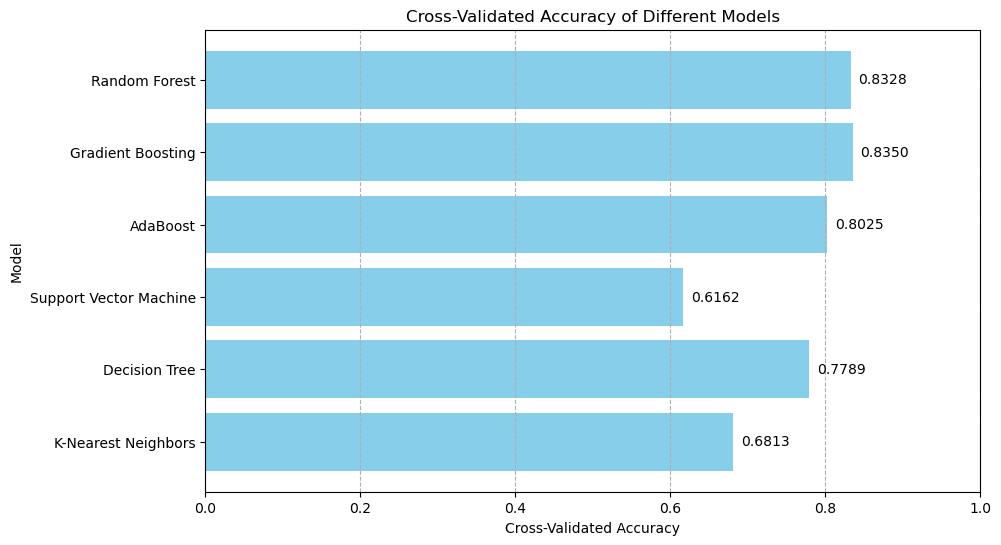

In [32]:
# Dictionary to store cross-validated accuracies
cv_accuracies = {}

# Perform cross-validation for each model
for model_name, model in models.items():
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    mean_cv_score = cv_scores.mean()
    std_cv_score = cv_scores.std()
    
    # Store results
    cv_accuracies[model_name] = mean_cv_score
    
    print(f"{model_name}: Mean CV Accuracy = {mean_cv_score:.4f}, Std = {std_cv_score:.4f}")

# Plot cross-validated accuracies
plt.figure(figsize=(10, 6))
bars = plt.barh(list(cv_accuracies.keys()), list(cv_accuracies.values()), color='skyblue')
plt.xlabel('Cross-Validated Accuracy')
plt.ylabel('Model')
plt.title('Cross-Validated Accuracy of Different Models')
plt.xlim([0, 1])

for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.4f}', va='center')

plt.grid(axis='x', linestyle='--')
plt.show()


In [73]:
# # Initialize models
# models = {
#     'K-Nearest Neighbors': KNeighborsClassifier(),
#     'Decision Tree': DecisionTreeClassifier(random_state=42),
#     'Support Vector Machine': SVC(random_state=42),
#     'AdaBoost': AdaBoostClassifier(random_state=42),
#     'Gradient Boosting': GradientBoostingClassifier(random_state=42),
#     'Random Forest': RandomForestClassifier(random_state=42)
# }

# # Train and evaluate each model
# for model_name, model in models.items():
#     model.fit(X_train, y_train)  # Train the model
#     y_pred = model.predict(X_test)  # Predict on the test set
#     accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
#     print(f"{model_name}: Accuracy = {accuracy:.4f}")

K-Nearest Neighbors: Accuracy = 0.6648
Decision Tree: Accuracy = 0.7821
Support Vector Machine: Accuracy = 0.5866
AdaBoost: Accuracy = 0.8101
Gradient Boosting: Accuracy = 0.8324
Random Forest: Accuracy = 0.8156


K-Nearest Neighbors: Accuracy = 0.6648
Decision Tree: Accuracy = 0.7821
Support Vector Machine: Accuracy = 0.5866
AdaBoost: Accuracy = 0.8101
Gradient Boosting: Accuracy = 0.8324
Random Forest: Accuracy = 0.8156


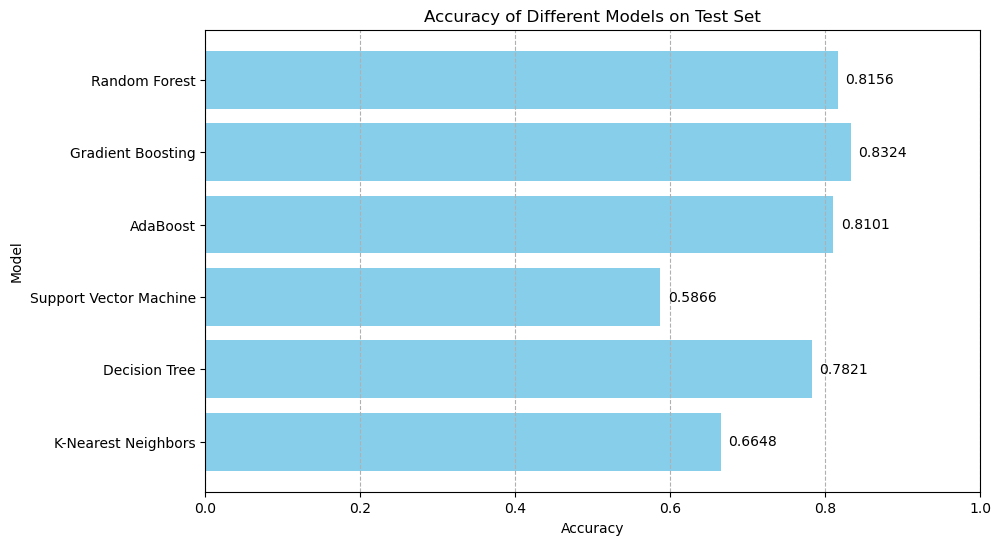

In [74]:
# model_accuracies = {}
# for model_name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     model_accuracies[model_name] = accuracy
#     print(f"{model_name}: Accuracy = {accuracy:.4f}")

# plt.figure(figsize=(10, 6))
# bars = plt.barh(list(model_accuracies.keys()), list(model_accuracies.values()), color='skyblue')
# plt.xlabel('Accuracy')
# plt.ylabel('Model')
# plt.title('Accuracy of Different Models on Test Set')
# plt.xlim([0, 1])

# for bar in bars:
#     plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.4f}', va='center')

# plt.grid(axis='x', linestyle='--')
# plt.show()

In [33]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [88]:
# import optuna

# def objective(trial):
#     # Define search space
#     n_estimators = trial.suggest_int('n_estimators', 100, 500)
#     learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1)
#     max_depth = trial.suggest_int('max_depth', 3, 7)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
#     subsample = trial.suggest_float('subsample', 0.7, 1.0)

#     # Define model
#     model = GradientBoostingClassifier(
#         n_estimators=n_estimators,
#         learning_rate=learning_rate,
#         max_depth=max_depth,
#         min_samples_split=min_samples_split,
#         min_samples_leaf=min_samples_leaf,
#         subsample=subsample,
#         random_state=42
#     )

#     # Train and evaluate model
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
    
#     return accuracy

# # Run optimization
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)

# # Best parameters and best score
# print(f"Best parameters: {study.best_params}")
# print(f"Best test set accuracy: {study.best_value:.4f}")

[I 2024-10-03 15:51:25,863] A new study created in memory with name: no-name-87dcc25d-753a-4dcc-be98-04af8d3ff3ef
[I 2024-10-03 15:51:26,218] Trial 0 finished with value: 0.8435754189944135 and parameters: {'n_estimators': 180, 'learning_rate': 0.027184439824524807, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 5, 'subsample': 0.7955582249917781}. Best is trial 0 with value: 0.8435754189944135.
[I 2024-10-03 15:51:26,405] Trial 1 finished with value: 0.8491620111731844 and parameters: {'n_estimators': 133, 'learning_rate': 0.048095083449988724, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 2, 'subsample': 0.7448050375091666}. Best is trial 1 with value: 0.8491620111731844.
[I 2024-10-03 15:51:26,995] Trial 2 finished with value: 0.8324022346368715 and parameters: {'n_estimators': 388, 'learning_rate': 0.01652620113111338, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 3, 'subsample': 0.9113503117730088}. Best is trial 1 with value: 0.84916201117

Best parameters: {'n_estimators': 249, 'learning_rate': 0.07862647533131135, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 1, 'subsample': 0.8476792147589755}
Best test set accuracy: 0.8659


In [35]:
import optuna
def objective(trial):
    # Define search space for hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1)
    max_depth = trial.suggest_int('max_depth', 3, 7)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    subsample = trial.suggest_float('subsample', 0.7, 1.0)

    # Define model with current trial's hyperparameters
    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        subsample=subsample,
        random_state=42
    )

    # Perform cross-validation and return the mean accuracy
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    return cv_scores.mean()

# Run optimization with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Best parameters and best score
print(f"Best parameters: {study.best_params}")
print(f"Best cross-validated accuracy: {study.best_value:.4f}")

[I 2024-10-03 16:00:58,444] A new study created in memory with name: no-name-12d20c6a-e8a6-48a9-bcf0-c5b214446687
[I 2024-10-03 16:00:59,603] Trial 0 finished with value: 0.8305504990270542 and parameters: {'n_estimators': 261, 'learning_rate': 0.032439236218489265, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 5, 'subsample': 0.7055303974843651}. Best is trial 0 with value: 0.8305504990270542.
[I 2024-10-03 16:01:00,233] Trial 1 finished with value: 0.8395455401418618 and parameters: {'n_estimators': 118, 'learning_rate': 0.09106406657421973, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 2, 'subsample': 0.9653690931459524}. Best is trial 1 with value: 0.8395455401418618.
[I 2024-10-03 16:01:04,357] Trial 2 finished with value: 0.8395518172117257 and parameters: {'n_estimators': 479, 'learning_rate': 0.0268623601225332, 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 4, 'subsample': 0.8419463473111191}. Best is trial 2 with value: 0.839551817211

Best parameters: {'n_estimators': 432, 'learning_rate': 0.05116375883599132, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 2, 'subsample': 0.854653103448739}
Best cross-validated accuracy: 0.8496


In [36]:
# Extract the best parameters from the Optuna
best_params = study.best_params

# Train the Gradient Boosting model using the best parameters
final_gb_model = GradientBoostingClassifier(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    subsample=best_params['subsample'],
    random_state=42
)

# # Fit the final model on the training data
# final_gb_model.fit(X_train, y_train)

final_gb_model.fit(X, y)

GradientBoostingClassifier(learning_rate=0.05116375883599132,
                           min_samples_leaf=2, min_samples_split=9,
                           n_estimators=432, random_state=42,
                           subsample=0.854653103448739)

In [78]:
# # Seeing if cross validation is a better alternative to train-test split
# from sklearn.model_selection import cross_val_score

# # Perform cross-validation on the final model
# cv_scores = cross_val_score(final_gb_model, X_train, y_train, cv=5, scoring='accuracy')
# print(f"Cross-validated accuracy: Mean = {cv_scores.mean():.4f}, Std = {cv_scores.std():.4f}")

Cross-validated accuracy: Mean = 0.8090, Std = 0.0237


Possible overfitting of train-test split as cross-validation has lower mean accuracy

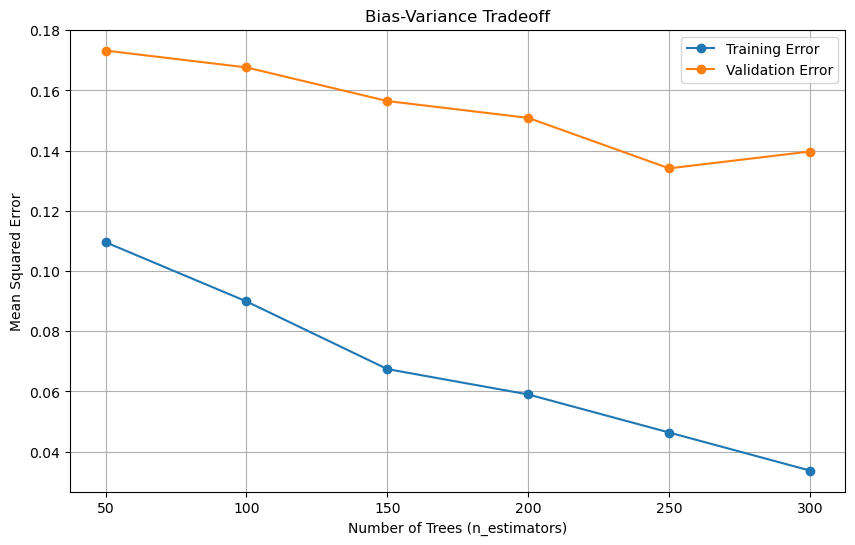

In [90]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error

# # Define a range for n_estimators
# n_estimators_range = [50, 100, 150, 200, 250, 300]

# # Store training and validation errors
# training_errors = []
# validation_errors = []

# # Loop through n_estimators values
# for n_estimators in n_estimators_range:
#     model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=best_params['learning_rate'],
#                                        max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'],
#                                        min_samples_leaf=best_params['min_samples_leaf'], subsample=best_params['subsample'], random_state=42)
#     model.fit(X_train, y_train)
    
#     # Calculate training and validation error
#     train_pred = model.predict(X_train)
#     val_pred = model.predict(X_test)
    
#     train_error = mean_squared_error(y_train, train_pred)
#     val_error = mean_squared_error(y_test, val_pred)
    
#     training_errors.append(train_error)
#     validation_errors.append(val_error)

# # Plot the bias-variance tradeoff
# plt.figure(figsize=(10, 6))
# plt.plot(n_estimators_range, training_errors, label='Training Error', marker='o')
# plt.plot(n_estimators_range, validation_errors, label='Validation Error', marker='o')
# plt.xlabel('Number of Trees (n_estimators)')
# plt.ylabel('Mean Squared Error')
# plt.title('Bias-Variance Tradeoff')
# plt.legend()
# plt.grid()
# plt.show()


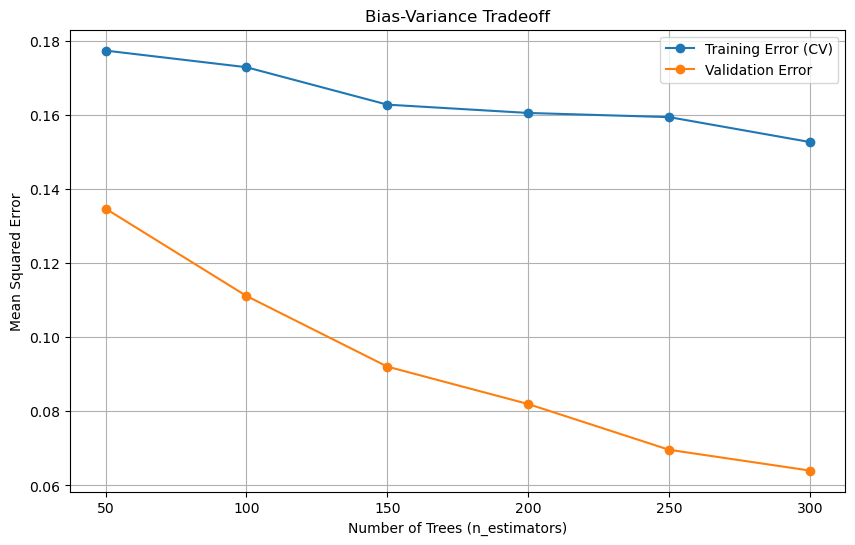

In [37]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

# Define a range for n_estimators
n_estimators_range = [50, 100, 150, 200, 250, 300]

# Store training and validation errors
training_errors = []
validation_errors = []

# Separate features and target
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

# Loop through n_estimators values
for n_estimators in n_estimators_range:
    # Initialize Gradient Boosting model with the current n_estimators and best params from Optuna
    model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=best_params['learning_rate'],
                                       max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'], subsample=best_params['subsample'], random_state=42)
    
    # Get cross-validated predictions for training data (5-fold cross-validation)
    train_pred = cross_val_predict(model, X, y, cv=5)
    
    # Calculate cross-validated training error
    train_error = mean_squared_error(y, train_pred)
    training_errors.append(train_error)
    
    # Fit model to the entire data and calculate the validation error using cross-validation
    model.fit(X, y)
    val_pred = model.predict(X)
    val_error = mean_squared_error(y, val_pred)
    validation_errors.append(val_error)

# Plot the bias-variance tradeoff
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, training_errors, label='Training Error (CV)', marker='o')
plt.plot(n_estimators_range, validation_errors, label='Validation Error', marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.grid()
plt.show()

Early Stage (Low n_estimators): 
When n_estimators is low (e.g., 50), both training and validation errors are relatively high. This suggests underfitting (high bias), as the model is too simple to capture patterns in the data.

Middle Range (150–200 n_estimators): 
Both training and validation errors are lower, indicating that the model complexity is just right to balance bias and variance. The validation error is minimized, which means that the model generalizes well to unseen data.

Later Stage (250–300 n_estimators): 
The training error continues to decrease, but the validation error stabilizes and does not decrease further. This is a sign that adding more complexity does not improve model generalization, and the model is starting to overfit the training data (increasing variance).

Is This a Good Result?
Yes, It Shows Good Performance Until a Certain Point: The model shows a good balance between training and validation errors up until around 150–200 trees. This is likely the optimal number of trees for your Gradient Boosting model.
Avoid Further Complexity: Beyond this point (after ~200 trees), adding more complexity (more trees) does not improve validation performance and can start to overfit the training data.

In [38]:
# We might be overfitting a little but it barely crossed over the 250 mark so it is not that worrying
print(f"Number of trees (n_estimators): {final_gb_model.n_estimators}")

Number of trees (n_estimators): 432


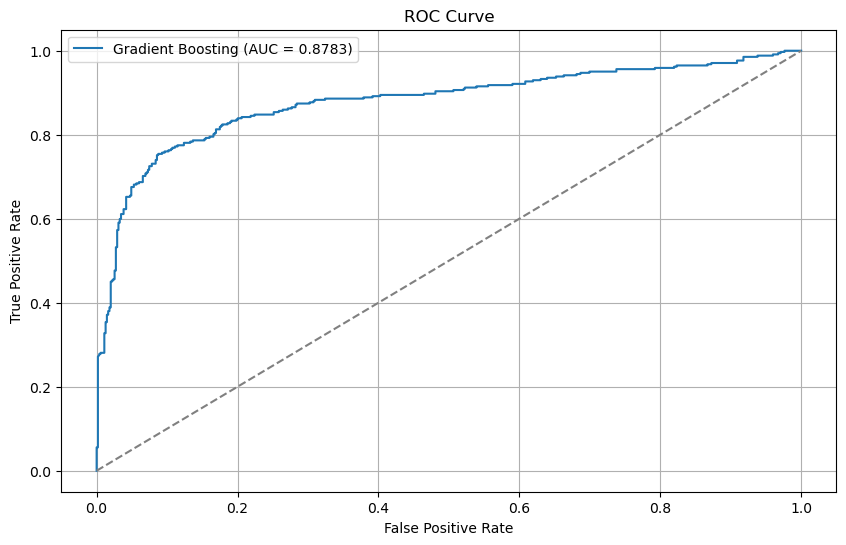

Cross-validated AUC score: 0.8783


In [39]:
# from sklearn.metrics import roc_curve, roc_auc_score

# # Calculate predicted probabilities
# y_pred_proba = final_gb_model.predict_proba(X_test)[:, 1]

# # Calculate the ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# # Calculate AUC score
# auc_score = roc_auc_score(y_test, y_pred_proba)

# # Plot the ROC curve
# plt.figure(figsize=(10, 6))
# plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {auc_score:.4f})', marker='o')
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for reference
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend()
# plt.grid()
# plt.show()

# ROC Curve AUC score of 0.9006 indicates very good discriminatory ability of the model.

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Separate features and target
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

# Initialize Gradient Boosting model with the best parameters
final_gb_model = GradientBoostingClassifier(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    subsample=best_params['subsample'],
    random_state=42
)

# Use cross_val_predict to obtain cross-validated predictions for probabilities
y_pred_proba = cross_val_predict(final_gb_model, X, y, cv=5, method='predict_proba')[:, 1]

# Calculate the ROC curve using cross-validated probabilities
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)

# Calculate AUC score using cross-validated probabilities
auc_score = roc_auc_score(y, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# AUC score
print(f'Cross-validated AUC score: {auc_score:.4f}')



## Doing the same feature engineering techniques on the test data set

In [93]:
df_test

,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,Ticket_Num,AgeBin,FareBin,FamilySize,IsAlone,FarePerPerson,Ticket_PCA_1,Ticket_PCA_2,Ticket_PCA_3,Ticket_PCA_4,Ticket_PCA_5
0,3,0,0.386231,-0.496617,True,False,330911,0,1,1,1,-0.391389,-0.843150,0.019957,0.016393,0.003761,0.002261
1,3,1,1.371370,-0.511477,False,True,363272,2,1,2,0,-0.513095,-0.843150,0.019957,0.016393,0.003761,0.002261
2,2,0,2.553537,-0.463315,True,False,240276,3,2,1,1,-0.339146,-0.843150,0.019957,0.016393,0.003761,0.002261
3,3,0,-0.204852,-0.481684,False,True,315154,0,2,1,1,-0.367962,-0.843150,0.019957,0.016393,0.003761,0.002261
4,3,1,-0.598908,-0.416721,False,True,3101298,0,2,3,0,-0.496345,-0.843150,0.019957,0.016393,0.003761,0.002261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,-0.204852,-0.492660,False,True,53236,0,2,1,1,-0.385181,1.961004,-0.725605,-1.134593,-0.576026,-0.477474
414,1,1,0.740881,1.314643,False,False,17758,0,3,1,1,2.450007,2.204517,3.013148,0.851783,0.139794,0.078954
415,3,0,0.701476,-0.506997,False,True,3101262,0,1,1,1,-0.407672,2.008161,-0.985585,-2.250109,6.503947,0.958363
416,3,0,-0.204852,-0.492660,False,True,359309,0,2,1,1,-0.385181,-0.843150,0.019957,0.016393,0.003761,0.002261


In [40]:
# Dropping irrelevant columns
df_test.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)

# Fill 'Age' with median value
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)

# Fill 'Embarked' with the most common value
df_test['Embarked'].fillna(df_test['Embarked'].mode()[0], inplace=True)

# Encode 'Sex' as a binary variable
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
df_test = pd.get_dummies(df_test, columns=['Embarked'], drop_first=True)

# Separate the prefix and numeric part
df_test['Ticket_Prefix'] = df_test['Ticket'].apply(lambda x: x.split(' ')[0] if len(x.split(' ')) > 1 else 'NoPrefix')
df_test['Ticket_Num'] = df_test['Ticket'].apply(lambda x: ''.join(filter(str.isdigit, x)) if any(char.isdigit() for char in x) else '0').astype(int)

df_test = pd.get_dummies(df_test, columns=['Ticket_Prefix'], drop_first=True, prefix='Ticket_Prefix')

if 'Ticket' in df_test.columns:
    df_test.drop('Ticket', axis=1, inplace=True)

df_test['AgeBin'] = pd.cut(df_test['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])
df_test['FareBin'] = pd.qcut(df_test['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1  # Add 1 to include the passenger
# Create a FamilySize feature by combining the SibSp (siblings/spouses aboard) and Parch (parents/children aboard)

# Combine 'SibSp' and 'Parch' into 'FamilySize' and create 'IsAlone'
df_test['IsAlone'] = 1
df_test['IsAlone'].loc[df_test['FamilySize'] > 1] = 0

# Drop columns that are not useful for modeling
columns_to_drop = ['SibSp', 'Parch']  # FamilySize and IsAlone are sufficient
df_test.drop(columns=columns_to_drop, axis=1, inplace=True)

# Binning 'Age' and 'Fare'
df_test['AgeBin'] = pd.cut(df_test['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])
df_test['FareBin'] = pd.qcut(df_test['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Label encode 'AgeBin' and 'FareBin'
df_test['AgeBin'] = le.fit_transform(df_test['AgeBin'])
df_test['FareBin'] = le.fit_transform(df_test['FareBin'])

# Create 'FarePerPerson'
df_test['FarePerPerson'] = df_test['Fare'] / df_test['FamilySize']

# Handle missing values before scaling and PCA
# Fill missing 'Fare' with the median of training data
df_test['Fare'].fillna(df_train['Fare'].median(), inplace=True)

# Fill missing 'FarePerPerson' with the median of training data
df_test['FarePerPerson'].fillna(df_train['FarePerPerson'].median(), inplace=True)

# Columns that are needed to scale (including Ticket Prefix and other continuous features)
ticket_prefix_cols = [col for col in df_test.columns if col.startswith('Ticket_Prefix_')]
continuous_cols = ['Age', 'Fare', 'FarePerPerson'] + ticket_prefix_cols

# Standard scale all continuous columns
scaler = StandardScaler()
df_test[continuous_cols] = scaler.fit_transform(df_test[continuous_cols])

# Apply PCA on the scaled Ticket Prefix columns
pca = PCA(n_components=5)  # You can set n_components as needed
ticket_prefix_pca = pca.fit_transform(df_test[ticket_prefix_cols])

# Create a DataFrame for PCA components and replace original ticket prefix columns
ticket_pca_df = pd.DataFrame(ticket_prefix_pca, columns=[f'Ticket_PCA_{i+1}' for i in range(ticket_prefix_pca.shape[1])])
df_test = pd.concat([df_test.drop(columns=ticket_prefix_cols), ticket_pca_df], axis=1)

In [41]:
predictions = final_gb_model.predict(df_test)

NotFittedError: This GradientBoostingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [42]:
# Get the best parameters from the Optuna study
best_params = study.best_params

# Initialize the final Gradient Boosting model with the best parameters
final_gb_model = GradientBoostingClassifier(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    subsample=best_params['subsample'],
    random_state=42  # Keep random state for reproducibility
)
# Fit the final model on the entire training data (X and y from df_train)
final_gb_model.fit(X, y)

# Predict on the test set
predictions = final_gb_model.predict(df_test)


In [43]:
# Reload the original test CSV to get PassengerId
df_test_original = pd.read_csv(r"C:\Users\jonat\Downloads\test.csv")

submission = pd.DataFrame({
    'PassengerId': df_test_original['PassengerId'],  # Use the original PassengerId
    'Survived': predictions  # Use your predictions array
})

In [44]:
submission.to_csv('submission2.csv', index=False)